# Pima Indians Diabetes Database

## 데이터 로드

In [9]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.isnull().sum() # 비어있는 값 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
y = df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [11]:
x = df.drop(['Outcome'], axis=1).values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## X에 대해 정규화를 수행

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [38]:
x.shape, y.shape

((768, 8), (768,))

## 트레인셋과 테스트 셋을 분리

In [41]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1234)

## 딥러닝 모델을 구성

In [42]:
# 필요한 라이브러리 임포트
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# 시그모이드로 0~1사의 값을 최종 출력
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

# 시그모이드 미분
def sigmoid_prime(z):
    return z * (1-z)


# 성능 이슈로 시그모이드가 아닌 relu 함수를 사용한다.
def relu(x):
    return np.maximum(0, x)


# 렐루의 미분 함수
def relu2deriv(output): 
    return output >= 0 

# 랜덤 시드
seed = 884736743
rng = np.random.default_rng(seed)

# 레이어에 필요한 변수 설정
learning_rate= 0.00005
epochs = 100
hidden_size= 4       # 히든 계층의 노드 개수
pixels_per_image = 8 # 입력 계층의 노드 개수
num_labels = 1

# 각 레이어에 필요한 가중치 설정
weights_1 = 0.2 * rng.random((pixels_per_image, hidden_size)) - 0.1 # 784x100
weights_2 = 0.2 * rng.random((hidden_size, num_labels)) - 0.1       # 100x10

# 학습 진행 현황을 기록할 저장소
store_training_loss = []
store_training_accurate_pred = []
store_test_loss = []
store_test_accurate_pred = []

# 루프 시작
for j in range(epochs):
    training_loss = 0.0
    training_accurate_predictions = 0
    
    for i in range(len(train_x)):
        # 포워드 패스
        layer_0 = train_x[i] # input
        layer_1 = relu(np.dot(layer_0, weights_1)) # l1
        layer_2 = sigmoid(np.dot(layer_1, weights_2)) # l2
        
        # 업데이트를 위해 오차 계산
        layer_2_delta = (train_y[i] - layer_2) * sigmoid_prime(layer_2) # 마지막 레이어의 Loss
        layer_1_delta = np.dot(weights_2, layer_2_delta) * relu2deriv(layer_1) # 한 레이어 전의 오류 계산
        
        # 변화할 가중치를 원래 가중치에 더함
        weights_1 += learning_rate * np.outer(layer_0, layer_1_delta)
        weights_2 += learning_rate * np.outer(layer_1, layer_2_delta)
        
    # 한번의 에포치가 종료될 때마다 평가 결과를 측정한다.
    results = sigmoid(relu(test_x @ weights_1) @ weights_2)
    test_loss = np.sum((test_y - results) ** 2 )/test_x.shape[0] # MSE
    results[results >= 0.5] = 1 
    results[results < 0.5] = 0
    test_accurate_predictions =np.sum(results.flatten()== test_y)/test_x.shape[0]
    
    # 한번의 에포치가 종료될 때마다 훈련 결과를 측정한다.
    results = sigmoid(relu(train_x @ weights_1) @ weights_2)
    training_loss = np.sum((train_y - results) ** 2 ) / train_x.shape[0] # MSE
    results[results >= 0.5] = 1 
    results[results < 0.5] = 0
    training_accurate_predictions =  np.sum(results.flatten()== train_y)/train_x.shape[0]
    
    # 이번 에포치의 결과를 저장한다.
    store_training_loss.append(training_loss)
    store_training_accurate_pred.append(training_accurate_predictions)
    store_test_loss.append(test_loss)
    store_test_accurate_pred.append(test_accurate_predictions)
    
    # 이벤 에포치의 결과를 프린트
    print(f'''\
Epoch: {j} Training set error: {training_loss :.3f} \
Traing set accuracy: {training_accurate_predictions:.3f} \
Test set error: {test_loss:.3f} \
Test set accuracy: {test_accurate_predictions:.3f} \
''')        

Epoch: 0 Training set error: 153.330 Traing set accuracy: 0.679 Test set error: 38.459 Test set accuracy: 0.714 
Epoch: 1 Training set error: 153.330 Traing set accuracy: 0.679 Test set error: 38.459 Test set accuracy: 0.714 
Epoch: 2 Training set error: 153.329 Traing set accuracy: 0.679 Test set error: 38.458 Test set accuracy: 0.714 
Epoch: 3 Training set error: 153.328 Traing set accuracy: 0.679 Test set error: 38.458 Test set accuracy: 0.714 
Epoch: 4 Training set error: 153.327 Traing set accuracy: 0.681 Test set error: 38.458 Test set accuracy: 0.714 
Epoch: 5 Training set error: 153.327 Traing set accuracy: 0.681 Test set error: 38.458 Test set accuracy: 0.714 
Epoch: 6 Training set error: 153.326 Traing set accuracy: 0.682 Test set error: 38.458 Test set accuracy: 0.714 
Epoch: 7 Training set error: 153.325 Traing set accuracy: 0.682 Test set error: 38.458 Test set accuracy: 0.714 
Epoch: 8 Training set error: 153.324 Traing set accuracy: 0.682 Test set error: 38.457 Test set 

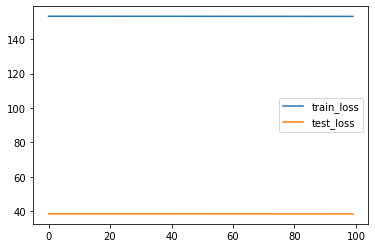

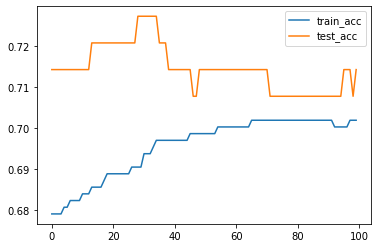

In [43]:
import pandas as pd

loss_history = pd.DataFrame([store_training_loss, store_test_loss], 
                            index = ['train_loss', 'test_loss'])
acc_history = pd.DataFrame([store_training_accurate_pred, store_test_accurate_pred], 
                            index = ['train_acc', 'test_acc'])

loss_history.T.plot()
plt.show()
acc_history.T.plot()
plt.show()

In [44]:
test_x.shape[0]

154

# MNIST를 예측 하는 모델에 드롭아웃 적용하기
이전에 사용했던 딥러닝 모델을 불러온다.

In [48]:
# 필요한 라이브러리 임포트
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 성능 이슈로 시그모이드가 아닌 relu 함수를 사용한다.
def relu(x):
    return np.maximum(0, x)


# 렐루의 미분 함수
def relu2deriv(output): 
    return output >= 0 


# 소프트맥스 함수
def softmax(a):
    # x를 그대로 전달하는 것이 아니라 각 값에서 최대 값을 차감
    x = a - np.max(a) #의 값은 기존보다 훨씬 작은 값이 안정화됨
    f_y = np.exp(x) / np.sum(np.exp(x)) # 오리지날 softmax 함수
    return f_y

def crossEntropyError(s, l):
    delta = 1e-10
    return -np.sum(l*np.log(s+delta))


# mnist 데이터셋의 전치리 수행
training_sample, test_sample = 10000, 1000
training_images = (x_train[0:training_sample]/255).reshape(-1, 784)
test_images = (x_test[0:test_sample]/255).reshape(-1, 784)

# y 레이블에 대한 원핫인코딩 수행
number_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ohe_y = OneHotEncoder(categories=[number_list], handle_unknown='ignore')
ohe_y.fit(t_train.reshape(-1,1))
training_labels  = ohe_y.transform(t_train.reshape(-1,1)).toarray()[:training_sample]
test_labels = ohe_y.transform(t_test.reshape(-1,1)).toarray()[:test_sample]

# 랜덤 시드
seed = 884736743
rng = np.random.default_rng(seed)

# 레이어에 필요한 변수 설정
learning_rate= 0.0005
epochs = 40
hidden_size= 100       # 히든 계층의 노드 개수
pixels_per_image = 784 # 입력 계층의 노드 개수
num_labels = 10

# 각 레이어에 필요한 가중치 설정
weights_1 = 0.2 * rng.random((pixels_per_image, hidden_size)) - 0.1 # 784x100
weights_2 = 0.2 * rng.random((hidden_size, num_labels)) - 0.1       # 100x10

# 학습 진행 현황을 기록할 저장소
store_training_loss = []
store_training_accurate_pred = []
store_test_loss = []
store_test_accurate_pred = []

# 루프 시작
for j in range(epochs):
    training_loss = 0.0
    training_accurate_predictions = 0
    
    for i in range(len(training_images)):
        
        # 훈련할 때마다 랜덤하게 dropout을 설정한다.
        dropout_mask = rng.integers(low=0, high=2, size=(hidden_size,))
        
        # 포워드 패스
        layer_0 = training_images[i] # input
        layer_1 = relu(np.dot(layer_0, weights_1)) # l1
        layer_1 *= dropout_mask
        layer_2 = softmax(np.dot(layer_1, weights_2)) # l2
        
        '''
        # 업데이트를 위해 오차 계산
        layer_2_delta = training_labels[i] - layer_2 # 마지막 레이어의 Loss
        layer_1_delta = np.dot(weights_2, layer_2_delta) * relu2deriv(layer_1) # 한 레이어 전의 오류 계산
        
        # 변화할 가중치를 원래 가중치에 더함
        weights_1 += learning_rate * np.outer(layer_0, layer_1_delta)
        weights_2 += learning_rate * np.outer(layer_1, layer_2_delta)
        '''
        
        # 에러텀 연산
        loss = training_labels[i] - layer_2
        layer2_error_term = loss * layer_2 # 10개
        layer1_error_term = np.dot(weights_2, layer2_error_term) * relu2deriv(layer_1)  # 100개
        layer1_error_term *= dropout_mask
        
        # 업데이트 w를 연산 
        weights_1 += learning_rate * np.dot(layer_0.reshape(784,1), layer1_error_term.reshape(1,100))
        weights_2 += learning_rate * np.dot(layer_1.reshape(100,1), layer2_error_term.reshape(1,10))
        
    # 한번의 에포치가 종료될 때마다 평가 결과를 측정한다.
    results = softmax(relu(test_images @ weights_1) @ weights_2)
    #test_loss = np.sum((test_labels - results) ** 2 )/test_sample # MSE
    test_loss = crossEntropyError(test_labels, results)
    test_accurate_predictions = np.sum(np.argmax(results, axis=1) == np.argmax(test_labels, axis=1))/test_sample
    
    # 한번의 에포치가 종료될 때마다 훈련 결과를 측정한다.
    results = softmax(relu(training_images @ weights_1) @ weights_2)
    #training_loss = np.sum((training_labels - results) ** 2 )/training_sample # MSE
    training_loss = crossEntropyError(training_labels, results)
    training_accurate_predictions = np.sum(np.argmax(results, axis=1) == np.argmax(training_labels, axis=1))/training_sample
    
    # 이번 에포치의 결과를 저장한다.
    store_training_loss.append(training_loss)
    store_training_accurate_pred.append(training_accurate_predictions)
    store_test_loss.append(test_loss)
    store_test_accurate_pred.append(test_accurate_predictions)
    
    # 이벤 에포치의 결과를 프린트
    print(f'''\
Epoch: {j} Training set error: {training_loss :.3f} \
Traing set accuracy: {training_accurate_predictions:.3f} \
Test set error: {test_loss:.3f} \
Test set accuracy: {test_accurate_predictions:.3f} \
''')        

Epoch: 0 Training set error: 20.516 Traing set accuracy: 0.190 Test set error: 20.571 Test set accuracy: 0.165 
Epoch: 1 Training set error: 20.275 Traing set accuracy: 0.321 Test set error: 20.366 Test set accuracy: 0.286 
Epoch: 2 Training set error: 19.971 Traing set accuracy: 0.419 Test set error: 20.114 Test set accuracy: 0.396 
Epoch: 3 Training set error: 19.535 Traing set accuracy: 0.462 Test set error: 19.769 Test set accuracy: 0.431 
Epoch: 4 Training set error: 18.798 Traing set accuracy: 0.467 Test set error: 19.213 Test set accuracy: 0.450 
Epoch: 5 Training set error: 16.951 Traing set accuracy: 0.447 Test set error: 17.891 Test set accuracy: 0.429 
Epoch: 6 Training set error: 11.677 Traing set accuracy: 0.441 Test set error: 13.648 Test set accuracy: 0.423 
Epoch: 7 Training set error: 4.827 Traing set accuracy: 0.456 Test set error: 6.147 Test set accuracy: 0.439 
Epoch: 8 Training set error: 1.517 Traing set accuracy: 0.484 Test set error: 1.779 Test set accuracy: 0.4

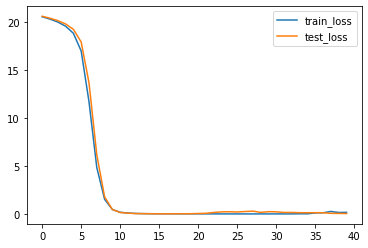

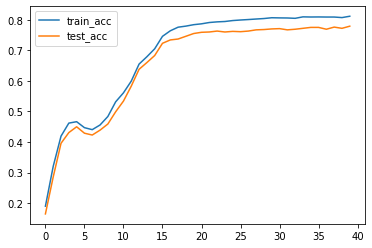

In [49]:
import pandas as pd

loss_history = pd.DataFrame([store_training_loss, store_test_loss], 
                            index = ['train_loss', 'test_loss'])
acc_history = pd.DataFrame([store_training_accurate_pred, store_test_accurate_pred], 
                            index = ['train_acc', 'test_acc'])

loss_history.T.plot()
plt.show()
acc_history.T.plot()
plt.show()